In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_dir = 'drive/MyDrive/CE784-Assignments/gaze_dataset/train/'
os.listdir(data_dir)

['Forward',
 'Centerstack',
 'Rearview_mirror',
 'Left_wing_mirror',
 'Right_wing_mirror']

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = data_dir
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)


Found 2500 files belonging to 5 classes.
Using 2000 files for training.
Found 2500 files belonging to 5 classes.
Using 500 files for validation.


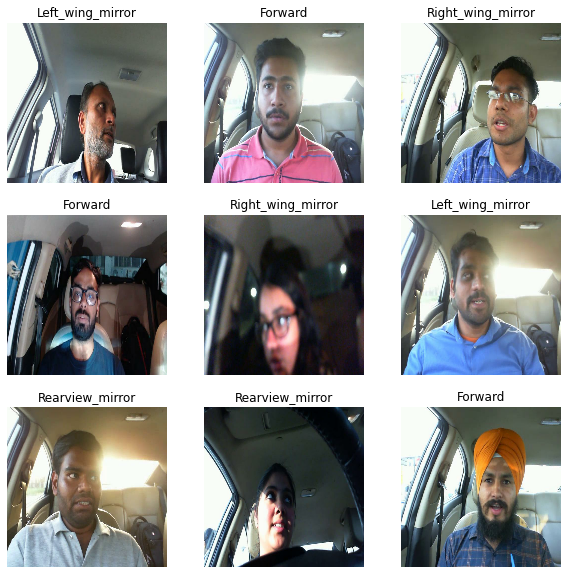

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
def alpaca_model(image_shape=IMG_SIZE):
    
    
    input_shape = image_shape + (3,)
    
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False, 
                                                   weights='imagenet') 
    
    base_model.trainable = False
    inputs = tf.keras.Input(shape=input_shape) 
    
    x =  tf.keras.applications.mobilenet_v2.preprocess_input(inputs) 
    
    x = base_model(x, training=False) 
    
    x = tfl.GlobalAveragePooling2D()(x) 
    x = tfl.Dropout(0.1)(x)
    prediction_layer = tfl.Dense(5, activation='softmax')
    
    
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [ ]:
model2 = alpaca_model(IMG_SIZE)
model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv_6 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_6 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_6   (None, 1280)             0         
 (GlobalAveragePooling2D)                                  

In [ ]:
base_learning_rate = 0.02
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 30
history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/30
63/63 [==============================] - 14s 156ms/step - loss: 4.1868 - accuracy: 0.2370 - val_loss: 2.1662 - val_accuracy: 0.3160
Epoch 2/30
63/63 [==============================] - 10s 138ms/step - loss: 2.0534 - accuracy: 0.3470 - val_loss: 2.6568 - val_accuracy: 0.3000
Epoch 3/30
63/63 [==============================] - 9s 136ms/step - loss: 1.9856 - accuracy: 0.3810 - val_loss: 2.1004 - val_accuracy: 0.3700
Epoch 4/30
63/63 [==============================] - 9s 138ms/step - loss: 1.6974 - accuracy: 0.4560 - val_loss: 2.3065 - val_accuracy: 0.3680
Epoch 5/30
63/63 [==============================] - 9s 138ms/step - loss: 1.5461 - accuracy: 0.4910 - val_loss: 1.9887 - val_accuracy: 0.4360
Epoch 6/30
63/63 [==============================] - 10s 141ms/step - loss: 1.5374 - accuracy: 0.5160 - val_loss: 1.8750 - val_accuracy: 0.4500
Epoch 7/30
63/63 [==============================] - 9s 137ms/step - loss: 1.7258 - accuracy: 0.4860 - val_loss: 2.0275 - val_accuracy: 0.4440
Epo

Text(0.5, 1.0, 'Training and Validation Accuracy')

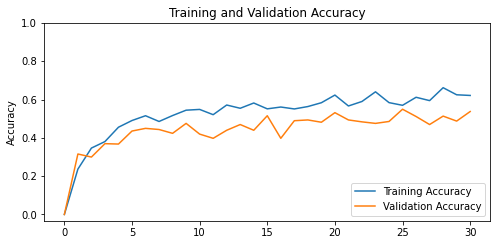

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')



In [ ]:
def alpaca_model2(image_shape=IMG_SIZE):
    
    
    input_shape = image_shape + (3,)
    
    base_model = tf.keras.applications.resnet50.ResNet50(input_shape=input_shape,
                                                   include_top=False, 
                                                   weights='imagenet') 
    
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=input_shape) 
    
    x = tf.keras.applications.resnet50.preprocess_input(inputs) 
    
    x = base_model(x, training=False) 
    x = tfl.GlobalAveragePooling2D()(x) 
        
    prediction_layer = tfl.Dense(5, activation='softmax')
    
    
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [ ]:
model3 = alpaca_model2(IMG_SIZE)

In [ ]:
base_learning_rate = 0.015
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 30
history = model3.fit(train_dataset, validation_data=train_dataset, epochs=initial_epochs)

Epoch 1/30
63/63 [==============================] - 22s 276ms/step - loss: 7.3745 - accuracy: 0.2300 - val_loss: 2.9835 - val_accuracy: 0.3800
Epoch 2/30
63/63 [==============================] - 17s 256ms/step - loss: 3.6312 - accuracy: 0.3140 - val_loss: 2.8880 - val_accuracy: 0.3865
Epoch 3/30
63/63 [==============================] - 17s 259ms/step - loss: 2.7416 - accuracy: 0.3745 - val_loss: 2.7592 - val_accuracy: 0.3920
Epoch 4/30
63/63 [==============================] - 17s 257ms/step - loss: 2.3549 - accuracy: 0.4450 - val_loss: 2.4879 - val_accuracy: 0.4035
Epoch 5/30
63/63 [==============================] - 17s 258ms/step - loss: 2.4825 - accuracy: 0.4680 - val_loss: 3.4605 - val_accuracy: 0.3845
Epoch 6/30
63/63 [==============================] - 17s 256ms/step - loss: 2.4118 - accuracy: 0.4765 - val_loss: 1.1340 - val_accuracy: 0.6280
Epoch 7/30
63/63 [==============================] - 17s 257ms/step - loss: 2.3342 - accuracy: 0.4965 - val_loss: 1.9543 - val_accuracy: 0.5245

Text(0.5, 1.0, 'Training and Validation Accuracy')

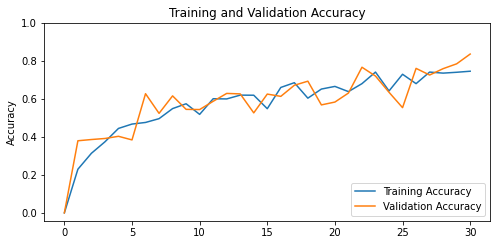

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = data_dir
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 2500 files belonging to 5 classes.
Using 2000 files for training.
Found 2500 files belonging to 5 classes.
Using 500 files for validation.


In [ ]:
input_shape = IMG_SIZE + (3,)
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=input_shape,
                                               include_top=True,
                                               weights='imagenet')

102981632/102967424 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_19[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
def alpaca_model3(image_shape=IMG_SIZE):
    
    
    input_shape = image_shape + (3,)
    
    
    base_model = tf.keras.applications.resnet50.ResNet50(input_shape=input_shape,
                                               include_top=True,
                                               weights='imagenet')
    
    base_model.trainable = True
    fine_tune_at = 170
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    inputs = tf.keras.Input(shape=input_shape) 
    
    x = tf.keras.applications.resnet50.preprocess_input(inputs) 
    
    x = base_model(x, training=False) 
    prediction_layer = tfl.Dense(5, activation='softmax')
    
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [ ]:
model4 = alpaca_model3(IMG_SIZE)

In [ ]:
model4.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_6   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_6 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_14 (Dense)            (None, 5)                 5005      
                                                                 
Total params: 25,641,717
Trainable params: 3,108,725
Non-t

In [ ]:
base_learning_rate = 0.1
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
initial_epochs = 30
history = model4.fit(train_dataset, validation_data=train_dataset, epochs=initial_epochs)

Epoch 1/30
63/63 [==============================] - 33s 450ms/step - loss: 1.6318 - accuracy: 0.1955 - val_loss: 1.6140 - val_accuracy: 0.1975
Epoch 2/30
63/63 [==============================] - 28s 430ms/step - loss: 1.6308 - accuracy: 0.1910 - val_loss: 1.6245 - val_accuracy: 0.1975
Epoch 3/30
63/63 [==============================] - 28s 429ms/step - loss: 1.6259 - accuracy: 0.1980 - val_loss: 1.6160 - val_accuracy: 0.2090
Epoch 4/30
63/63 [==============================] - 28s 430ms/step - loss: 1.6387 - accuracy: 0.1995 - val_loss: 1.6206 - val_accuracy: 0.1960
Epoch 5/30
63/63 [==============================] - 28s 428ms/step - loss: 1.6229 - accuracy: 0.1975 - val_loss: 1.6215 - val_accuracy: 0.1975
Epoch 6/30
63/63 [==============================] - 28s 427ms/step - loss: 1.6255 - accuracy: 0.1940 - val_loss: 1.6174 - val_accuracy: 0.1980
Epoch 7/30
63/63 [==============================] - 28s 430ms/step - loss: 1.6365 - accuracy: 0.1970 - val_loss: 1.6164 - val_accuracy: 0.2090

KeyboardInterrupt: ignored

In [ ]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 150

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = None
    
loss_function= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate*0.1)# 0.001
metrics=['accuracy']

model2.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

Number of layers in the base model:  177
